# 1. GDAL을 사용해 래스터 데이터 다루기

In [1]:
from osgeo import gdal

## TIF 가져오고 메타데이터 출력
- 메타데이터 : 생성 및 수정된 날짜, 해상도, 인치당 픽셀 등

In [5]:
nmtif = gdal.Open(r'C:/Users/Administrator/Desktop/nm_relief_color_tif/nm_relief_color.tif')
print(nmtif.GetMetadata())

{'AREA_OR_POINT': 'Area', 'TIFFTAG_DATETIME': '2002:12:18  8:10:06', 'TIFFTAG_RESOLUTIONUNIT': '2 (pixels/inch)', 'TIFFTAG_SOFTWARE': 'IMAGINE TIFF Support\nCopyright 1991 - 1999 by ERDAS, Inc. All Rights Reserved\n@(#)$RCSfile: etif.c $ $Revision: 1.9.3.3 $ $Date: 2002/07/29 15:51:11EDT $', 'TIFFTAG_XRESOLUTION': '96', 'TIFFTAG_YRESOLUTION': '96'}


## 투영 출력

In [6]:
nmtif.GetProjection()

'PROJCS["NAD83 / UTM zone 13N",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","26913"]]'

## 투영 설정

In [7]:
from osgeo import osr
p=osr.SpatialReference()
p.ImportFromEPSG(26913)
nmtif.SetProjection(p.ExportToWkt())
nmtif.GetProjection()

'PROJCS["NAD83 / UTM zone 13N",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","26913"]]'

## TIF 저장

In [ ]:
geoTiffDriver = "GTiff"
driver=gdal.GetDriverByName(geoTiffDriver)
out=driver.CreateCopy("copy.tif",nmtif,strict=0)

## 래스터 밴드(R,G,B)

In [8]:
nmtif.RasterCount

3

### 단일 밴드의 값

In [11]:
band = nmtif.GetRasterBand(1)
values=band.ReadAsArray()
values[1100,1100]

216

### 특정 픽셀의 세 개의 밴드의 값

In [12]:
one = nmtif.GetRasterBand(1).ReadAsArray()
two=nmtif.GetRasterBand(2).ReadAsArray()
three=nmtif.GetRasterBand(3).ReadAsArray()
print(str(one[1100,1100])+" "+str(two[1100,1100])+" "+str(three[1100,1100]))

216 189 157


### 특정 밴드의 평균과 표준편차

In [15]:
one=nmtif.GetRasterBand(1)
two=nmtif.GetRasterBand(2)
three=nmtif.GetRasterBand(3)
print(one.ComputeBandStats())
print(two.ComputeBandStats())
print(three.ComputeBandStats())

(225.05771967375847, 34.08382839593031)
(215.3145137636133, 37.83657996026153)
(195.34890652292185, 53.08308166590347)


In [16]:
print(str(one.GetMinimum())+" "+str(one.GetMaximum()))

0.0 255.0


### 밴드의 설명

In [17]:
print(two.GetDescription())
two.SetDescription("The Green Band")
print(two.GetDescription())

Band_2
The Green Band


In [18]:
import numpy as np
from matplotlib.pyplot import imshow
%matplotlib inline

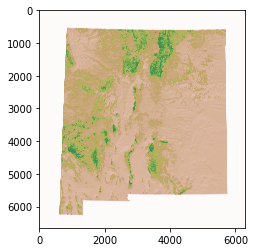

In [49]:
data_array=nmtif.ReadAsArray()
x=np.array(data_array[0])
x.shape
w, h = 6652, 6300
image = x.reshape(x.shape[0], x.shape[1])

imshow(image, cmap='gist_earth')

## 래스터 생성

In [63]:
a_raster=np.array([[10,10,1,10,10,10,10],
                 [1,1,1,50,10,10,50],
                 [10,1,1,51,10,10,50],
                 [1,1,1,1,50,10,50]])
coord=(-106.629773,35.105389) 
w, h = 10,10 # 픽셀 사이즈
name="BigI.tif"

In [64]:
d=gdal.GetDriverByName("GTiff")
output=d.Create(name, a_raster.shape[1],a_raster.shape[0],1,gdal.GDT_UInt16) # name, x크기, y크기, 밴드 수, 데이터 타입
output.SetGeoTransform((coord[0],w,0,coord[1],0,h)) # x_min, pixel_size, 0, y_max, 0, pixel_size
output.GetRasterBand(1).WriteArray(a_raster)
outsr=osr.SpatialReference()


outsr.ImportFromEPSG(4326)
output.SetProjection(outsr.ExportToWkt())


0

In [ ]:
output.FlushCache()

In [53]:
output.GetProjection()

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'

array([[10, 10,  1, 10, 10, 10, 10],
       [ 1,  1,  1, 50, 10, 10, 50],
       [10,  1,  1, 51, 10, 10, 50],
       [ 1,  1,  1,  1, 50, 10, 50]], dtype=uint16)

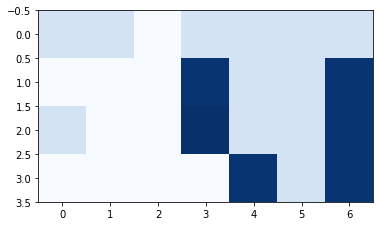

In [59]:
data = output.ReadAsArray()
#w, h = 4, 7
#image = data.reshape(w,h)
imshow(image,cmap='Blues')
data

# 2. PostgreSQL에서 래스터 처리하기

In [67]:
import psycopg2
connection = psycopg2.connect(database="pythonspatial",user="dajomi",password="dajomi")
cursor = connection.cursor()

In [68]:
cursor.execute("SELECT * from bigi")

UndefinedTable: 오류:  "bigi" 이름의 릴레이션(relation)이 없습니다
LINE 1: SELECT * from bigi
                      ^
